# Brain Stroke Prediction with EDA, Feature Engineering and Predictive Models


 ## 1. Exploratory Data Analysis(EDA)

#### Importing Libraries and Loading the Data


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
data=pd.read_csv('brain_stroke.csv')

### Let's visualize the data and see the features that could be used for the prediction of stroke label

In [ ]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [ ]:
data.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0
4980,Female,80.0,1,0,Yes,Private,Urban,83.75,29.1,never smoked,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [ ]:
data.isnull().sum() #checking for total null values

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Count the total samples of Brain Stroke in the dataset

stroke
0    4733
1     248
Name: count, dtype: int64


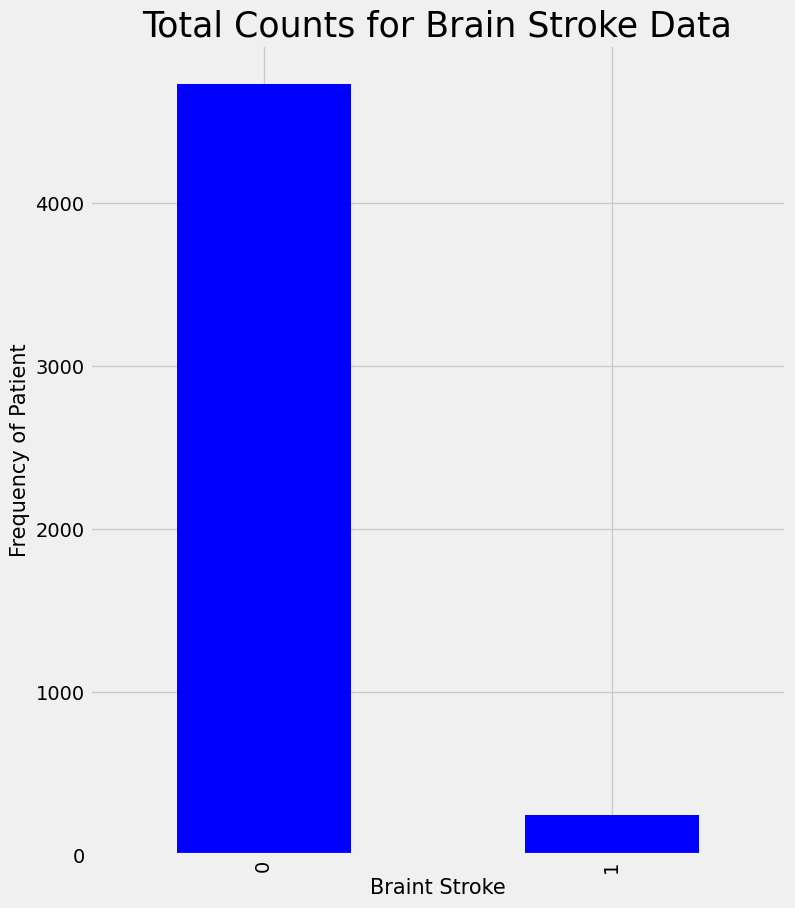

In [ ]:
plt.figure(figsize = (8,10))
print(data['stroke'].value_counts())
data['stroke'].value_counts().plot(kind = "bar", color = "blue")
plt.title('Total Counts for Brain Stroke Data', fontsize = 25)
plt.xlabel('Braint Stroke', fontsize = 15)
plt.ylabel('Frequency of Patient', fontsize = 15)
plt.show()

#### If we see any feature unrelated to label, we can just drop them before starting to EDA and preprocessing.

In [ ]:
data = data.drop(["ever_married", "work_type", "Residence_type"], axis =1)

In [ ]:
data.head()

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,105.92,32.5,never smoked,1
2,Female,49.0,0,0,171.23,34.4,smokes,1
3,Female,79.0,1,0,174.12,24.0,never smoked,1
4,Male,81.0,0,0,186.21,29.0,formerly smoked,1


## 2. Feature Engineering and Data Cleaning

We need to convert the continous values into categorical values by either Binning or Normalisation. Binning and normalisation both will be used in this section i.e group a range of ages into a single bin or assign them a single value.

In [ ]:
data.insert(2,'age_band', np.zeros)

In [ ]:
data.loc[data['age']<=16,'age_band']=0
data.loc[(data['age']>16)&(data['age']<=32),'age_band']=1
data.loc[(data['age']>32)&(data['age']<=48),'age_band']=2
data.loc[(data['age']>48)&(data['age']<=64),'age_band']=3
data.loc[data['age']>64,'age_band']=4
data.drop(columns= "age", inplace=True)
data["age_band"]=data['age_band'].astype(str).astype(int)
data.head()

,gender,age_band,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,Male,4,0,1,228.69,36.6,formerly smoked,1
1,Male,4,0,1,105.92,32.5,never smoked,1
2,Female,3,0,0,171.23,34.4,smokes,1
3,Female,4,1,0,174.12,24.0,never smoked,1
4,Male,4,0,0,186.21,29.0,formerly smoked,1


In [ ]:
data['age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')#checking the number of people in each band

,count
age_band,
3,1229
2,1067
4,1020
1,895
0,770


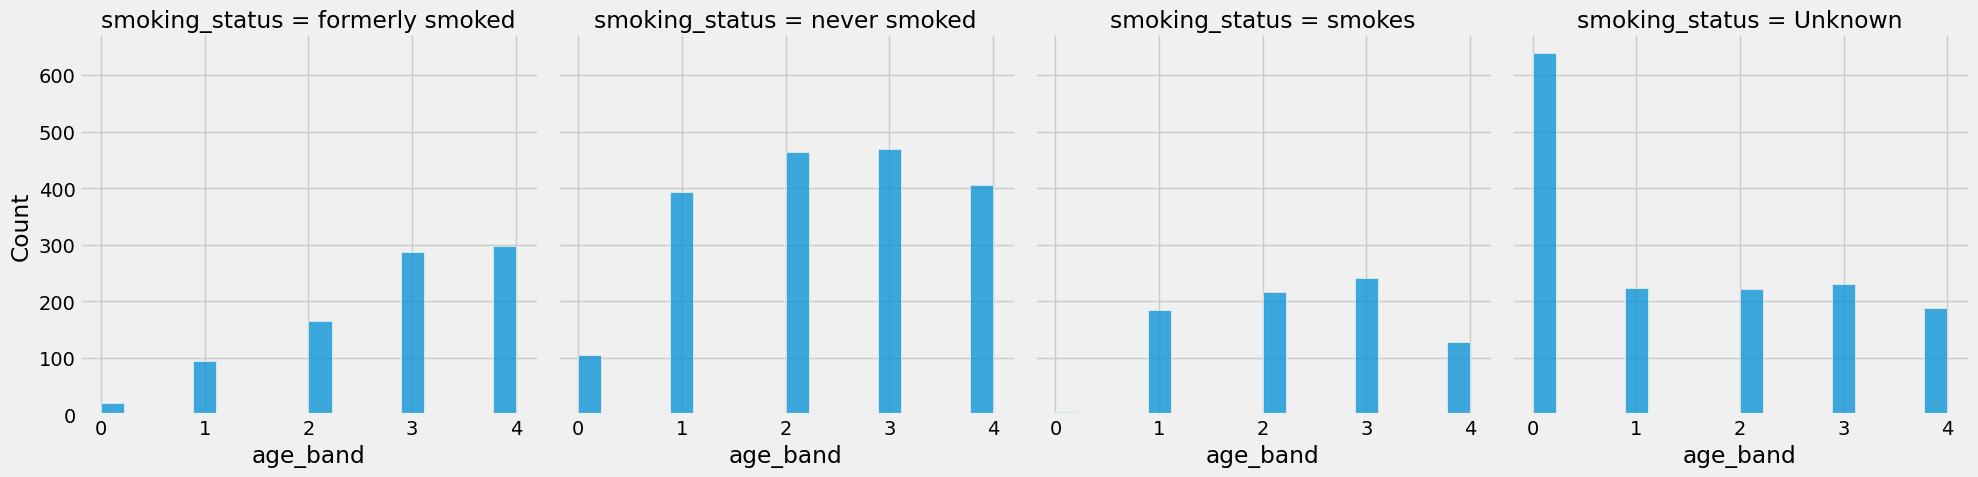

In [ ]:
sns.displot(data, x="age_band", col="smoking_status")
plt.show()

#### For all smoking status options there is an increase in stroke while age_band increasing. Let's normalize the continious features "average glucose level" and "bmi".

In [ ]:
# copy the data
data = data.copy()

# apply normalization techniques on Columns
column = 'avg_glucose_level'
column2 = 'bmi'
data[column] = data[column] /data[column].abs().max()
data[column2] = data[column2] /data[column2].abs().max()

# view normalized data
display(data[column], data[column2])

0       0.841577
1       0.389784
2       0.630124
3       0.640760
4       0.685251
          ...   
4976    0.258151
4977    0.703430
4978    0.349672
4979    0.308898
4980    0.308199
Name: avg_glucose_level, Length: 4981, dtype: float64

0       0.748466
1       0.664622
2       0.703476
3       0.490798
4       0.593047
          ...   
4976    0.609407
4977    0.635992
4978    0.650307
4979    0.613497
4980    0.595092
Name: bmi, Length: 4981, dtype: float64

#### We also need to conver string variables to numeric variables. So, we need to work on smoking_status and gender too.

In [ ]:
data['gender'].replace(['Male','Female'],[0,1],inplace=True)
data['gender'].head()

0    0
1    0
2    1
3    1
4    0
Name: gender, dtype: int64

In [ ]:
# What was the smoking status variables
data["smoking_status"].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [ ]:
data['smoking_status'].replace(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],[0,1,2,3],inplace=True)
data['smoking_status'].head()

0    0
1    1
2    2
3    1
4    0
Name: smoking_status, dtype: int64

## 3. Predictive Modelling

In [ ]:
#importing all the required ML packages
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [ ]:
not_stroke = data.query('stroke == 0')
stroke = data.query('stroke == 1')
not_stroke['stroke'].value_counts(), stroke['stroke'].value_counts()

(stroke
 0    4733
 Name: count, dtype: int64,
 stroke
 1    248
 Name: count, dtype: int64)

In [ ]:
balanced_df = pd.concat([stroke, not_stroke.sample(len(stroke), random_state=1)])
balanced_df['stroke'].value_counts()


stroke
1    248
0    248
Name: count, dtype: int64

In [ ]:
balanced_df = balanced_df.sample(frac=1, random_state=1)
balanced_df
data = balanced_df

#### Splitting the data into test and train sets

In [ ]:
train,test=train_test_split(data,test_size=0.2,random_state=0,stratify=data['stroke'])
train_X=train[train.columns[:-1]]
train_Y=train[train.columns[-1:]]
test_X=test[test.columns[:-1]]
test_Y=test[test.columns[-1:]]
X=data[data.columns[:-1]]
Y=data["stroke"]
len(train_X), len(train_Y), len(test_X), len(test_Y)


(396, 396, 100, 100)

#### Random Forests

In [ ]:
from sklearn.metrics import classification_report
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
predictionX = model.predict(test_X)
print(classification_report(test_Y, predictionX, target_names=['not_stroke', 'stroke']))

              precision    recall  f1-score   support

  not_stroke       0.80      0.64      0.71        50
      stroke       0.70      0.84      0.76        50

    accuracy                           0.74       100
   macro avg       0.75      0.74      0.74       100
weighted avg       0.75      0.74      0.74       100



[[32 18]
 [ 8 42]]


Text(0.5, 1.0, 'Confusion Matrix')

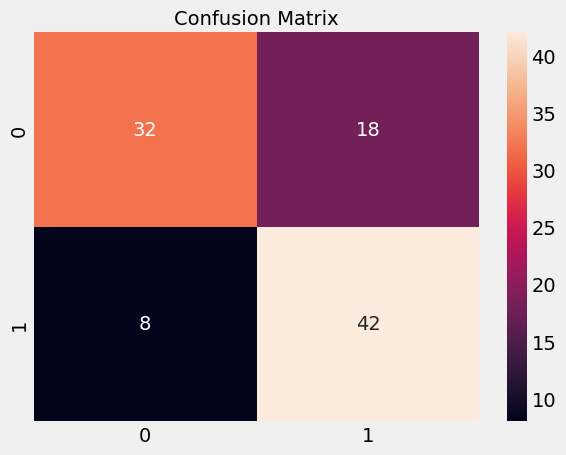

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(test_Y, predictionX)
print(cf)
sns.heatmap(cf, annot=True)
plt.title("Confusion Matrix", fontsize = 14)